<a href="https://colab.research.google.com/github/Rachit304/Machine-Leaning/blob/main/ML_Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import seaborn as sns

from sklearn import preprocessing

In [ ]:
df = pd.read_csv('Movie_classification.csv')
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [ ]:
df.isnull().sum()

Marketing expense       0
Production expense      0
Multiplex coverage      0
Budget                  0
Movie_length            0
Lead_ Actor_Rating      0
Lead_Actress_rating     0
Director_rating         0
Producer_rating         0
Critic_rating           0
Trailer_views           0
3D_available            0
Time_taken             12
Twitter_hastags         0
Genre                   0
Avg_age_actors          0
Num_multiplex           0
Collection              0
Start_Tech_Oscar        0
dtype: int64

In [ ]:
df = df.drop(['Time_taken'], axis=1)

In [ ]:
df.isnull().sum()

Marketing expense      0
Production expense     0
Multiplex coverage     0
Budget                 0
Movie_length           0
Lead_ Actor_Rating     0
Lead_Actress_rating    0
Director_rating        0
Producer_rating        0
Critic_rating          0
Trailer_views          0
3D_available           0
Twitter_hastags        0
Genre                  0
Avg_age_actors         0
Num_multiplex          0
Collection             0
Start_Tech_Oscar       0
dtype: int64

In [ ]:
df['Profit'] = df['Collection'] - df['Budget']
df['Result'] = df.apply(lambda x: 1 if x['Profit'] <= 10000 else 0, axis=1)
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,Profit,Result
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,223.840,Thriller,23,494,48000,1,11475.875,0
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,243.456,Drama,42,462,43200,0,7531.345,1
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,2022.400,Comedy,38,458,69400,1,29487.325,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,225.344,Drama,45,472,66800,1,27926.110,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,225.792,Drama,55,395,72400,1,32698.415,0


In [ ]:
inputs =df[['Budget','Collection','Genre','Profit']]
target = df['Start_Tech_Oscar']


In [ ]:
from sklearn.preprocessing import LabelEncoder

le_genre = LabelEncoder()

inputs['Genre_n'] = le_genre.fit_transform(inputs['Genre'])
inputs = inputs.drop(['Genre'],axis = 1)
inputs.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Budget,Collection,Profit,Genre_n
0,36524.125,48000,11475.875,3
1,35668.655,43200,7531.345,2
2,39912.675,69400,29487.325,1
3,38873.890,66800,27926.110,2
4,39701.585,72400,32698.415,2


In [ ]:
from sklearn import tree

model = tree.DecisionTreeRegressor()

In [ ]:
model.fit(inputs,target)

DecisionTreeRegressor()

In [ ]:
model.score(inputs,target)

1.0

score 1 becaues i'm using same data set which I used for training and also dataset is vey is simple

In [ ]:
model.predict([[30000,40000,10000,1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([1.])

In [ ]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(inputs, target, test_size= 0.25, random_state=0)
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()  
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)    

In [ ]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

              precision    recall  f1-score   support

           0       0.48      0.57      0.52        51
           1       0.67      0.58      0.62        76

    accuracy                           0.57       127
   macro avg       0.57      0.57      0.57       127
weighted avg       0.59      0.57      0.58       127



[Text(0.6363636363636364, 0.96875, 'X[2] <= 0.74\nentropy = 1.0\nsamples = 50\nvalue = [25, 25]'),
 Text(0.5454545454545454, 0.90625, 'X[0] <= -1.194\nentropy = 0.974\nsamples = 42\nvalue = [25, 17]'),
 Text(0.45454545454545453, 0.84375, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6363636363636364, 0.84375, 'X[0] <= 0.525\nentropy = 0.927\nsamples = 38\nvalue = [25, 13]'),
 Text(0.5454545454545454, 0.78125, 'X[0] <= 0.432\nentropy = 0.952\nsamples = 35\nvalue = [22, 13]'),
 Text(0.45454545454545453, 0.71875, 'X[0] <= 0.202\nentropy = 0.918\nsamples = 33\nvalue = [22, 11]'),
 Text(0.36363636363636365, 0.65625, 'X[2] <= -1.852\nentropy = 0.958\nsamples = 29\nvalue = [18, 11]'),
 Text(0.2727272727272727, 0.59375, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.45454545454545453, 0.59375, 'X[1] <= -1.163\nentropy = 0.94\nsamples = 28\nvalue = [18, 10]'),
 Text(0.36363636363636365, 0.53125, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.5454545454545454, 0.53125, '

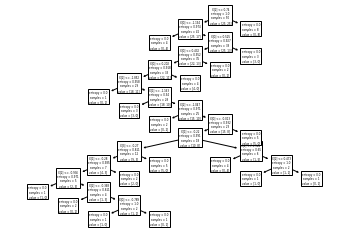

In [ ]:
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(criterion = 'entropy')
dtree.fit(x_train[:50],y_train[:50])
predictions= dtree.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,predictions))
tree.plot_tree(dtree)

In [ ]:
y_pred= classifier.predict(x_test)
y_pred

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
cm

array([[32, 19],
       [33, 43]])

# Linear Regression

In [ ]:
df1 = pd.read_excel("Folds5x2_pp.xlsx")
#importing dataset

In [ ]:
df1.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [ ]:
input1 = df1.drop(['AP','V','RH'], axis=1)
#dropping the column which won't be used

In [ ]:
input1 = input1.dropna()
#dropping the null values
input1.head()
#printing the head

,AT,PE
0,14.96,463.26
1,25.18,444.37
2,5.11,488.56
3,20.86,446.48
4,10.82,473.90


In [ ]:
X = input1.iloc[:, :-1].values
y = input1.iloc[:, 1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
# Predicting the Test set results
y_pred = regressor.predict(X_test)

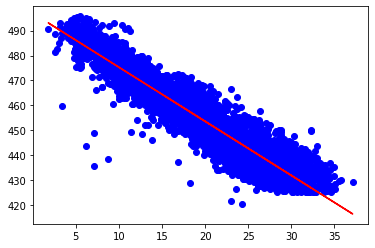

In [ ]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, regressor.predict(X_train), color = 'red')

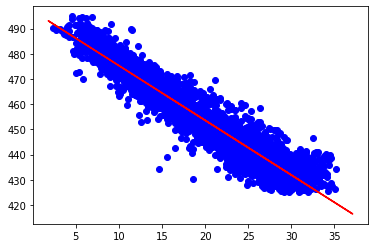

In [ ]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
# plt.title('Pollutant_min vs lable (Test set)')
# plt.xlabel('pollutant_min')
# plt.ylabel('lable')
plt.show()